# Analysis: Variable-p Bernoulli Trials
## (Poisson Binomial Distribution)

This notebook explores what happens to the distribution of successes when the probability of success, *p*, is **not constant** for every trial. This is known as a **Poisson Binomial Distribution**.

It calculates the *exact* Probability Mass Function (PMF) for *k* successes out of *n* trials, where each trial *i* has its own success probability *p_i*.

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

In [18]:
# --- Configuration ---

# List of success probabilities for each individual match (trial)
# Note: If all these were the same, it would be a standard Binomial distribution.
success_probas = np.array([0.1, 0.25, 0.5, 0.8])

n_matches = len(success_probas)
match_indices = np.array(range(n_matches))

In [19]:
# --- Calculate the PMF ---

# We will store the PMF P(X=k) in this array
pmf = np.zeros(n_matches + 1)

print(f"Calculating PMF for n={n_matches} trials with variable p...")

# Iterate over every possible number of successes, from 0 to n
for k_successes in range(n_matches + 1):
    
    # Get all unique combinations of {k_successes} successful matches
    combinations_for_k = itertools.combinations(match_indices, k_successes)
    
    proba_for_k = 0.0
    
    # Iterate over each specific combination (e.g., "2 successes : match 0 and 3")
    for combination in combinations_for_k:
        proba_of_combination = 1.0
        
        # `combination` is a tuple of indices that are "successes"
        # e.g., (0, 3) means match 0 and 3 are successes
        
        for match_idx in match_indices:
            if match_idx in combination:
                # This match is a success
                proba_of_combination *= success_probas[match_idx]
            else:
                # This match is a failure
                proba_of_combination *= (1.0 - success_probas[match_idx])
        
        # Add the probability of this specific combination to the total P(X=k) (each combination is independent)
        proba_for_k += proba_of_combination
    
    pmf[k_successes] = proba_for_k

print(f"PMF calculation complete. Sum of probabilities: {np.sum(pmf):.2f}")

Calculating PMF for n=4 trials with variable p...
PMF calculation complete. Sum of probabilities: 1.00


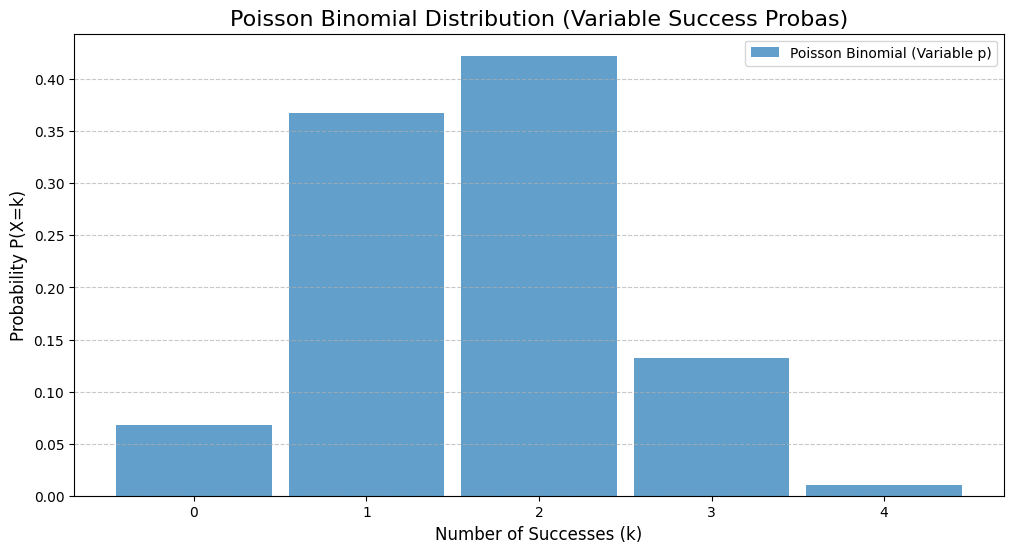

In [20]:
# --- Plot the Resulting Distribution ---
k_values = np.array(range(n_matches + 1))

plt.figure(figsize=(12, 6))
plt.bar(k_values, pmf, width=0.9, label="Poisson Binomial (Variable p)", alpha=0.7)

plt.title("Poisson Binomial Distribution (Variable Success Probas)", fontsize=16)
plt.xlabel("Number of Successes (k)", fontsize=12)
plt.ylabel("Probability P(X=k)", fontsize=12)
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Variable Probas: [0.1  0.25 0.5  0.8 ]
Mean Probability: 0.412


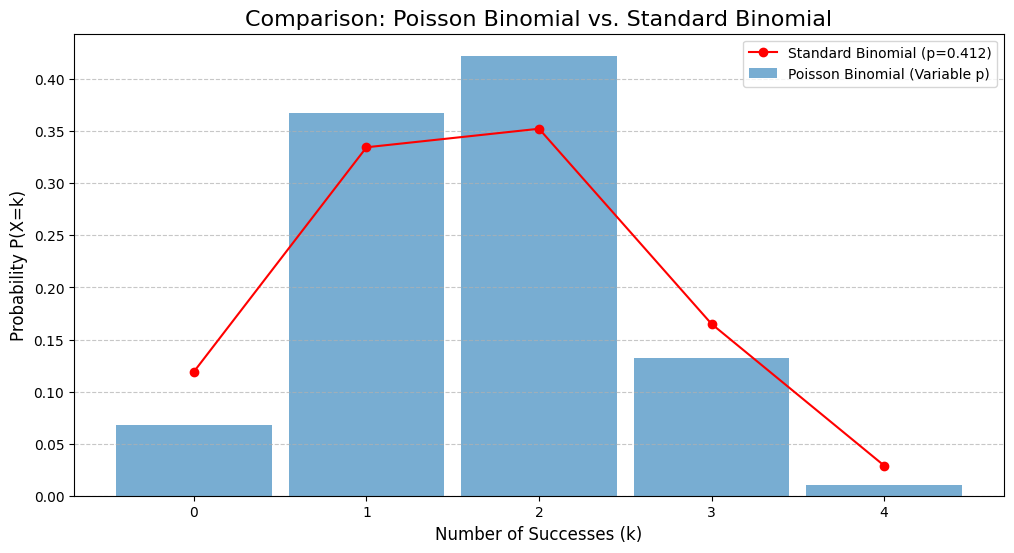


Notice how the Poisson Binomial distribution is often wider and flatter
(i.e., has higher variance) than a standard binomial with the same mean probability.


In [21]:
# --- Comparison: Standard vs. Poisson Binomial ---
# Let's compare this to a standard binomial distribution
# using the *average* probability of success.

mean_p = np.mean(success_probas)
binomial_pmf = binom.pmf(k_values, n_matches, mean_p)

print(f"Variable Probas: {success_probas}")
print(f"Mean Probability: {mean_p:.3f}")

plt.figure(figsize=(12, 6))

# Our calculated Poisson Binomial distribution
plt.bar(k_values, pmf, width=0.9, label=f"Poisson Binomial (Variable p)", alpha=0.6)

# The standard Binomial distribution for comparison
plt.plot(k_values, binomial_pmf, 'o-', color='red', label=f"Standard Binomial (p={mean_p:.3f})")

plt.title("Comparison: Poisson Binomial vs. Standard Binomial", fontsize=16)
plt.xlabel("Number of Successes (k)", fontsize=12)
plt.ylabel("Probability P(X=k)", fontsize=12)
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

print("\nNotice how the Poisson Binomial distribution is often wider and flatter")
print("(i.e., has higher variance) than a standard binomial with the same mean probability.")